In [1]:
from datetime import datetime 
import pandas_datareader.data as web
import numpy as np
%matplotlib inline
# Time series library
import statsmodels.tsa.stattools as ts

In [2]:
symbol = 'AMXL.MX'
start = datetime(2015,1,1)

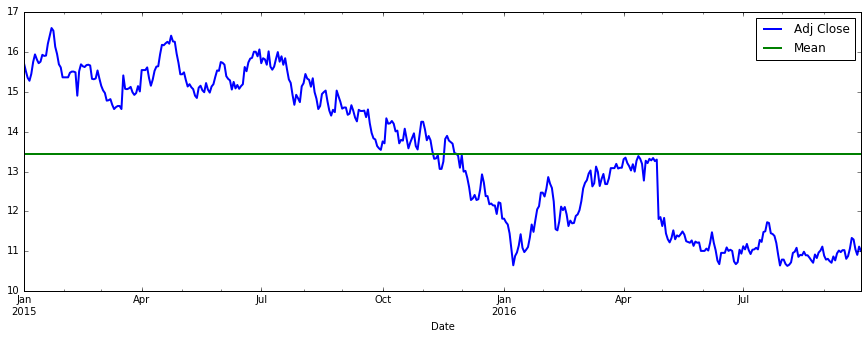

In [3]:
df = web.DataReader(symbol, start=start, data_source='yahoo')

df['Mean'] = df['Adj Close'].mean()

df[['Adj Close','Mean']].plot(figsize=(15,5), linewidth=2)




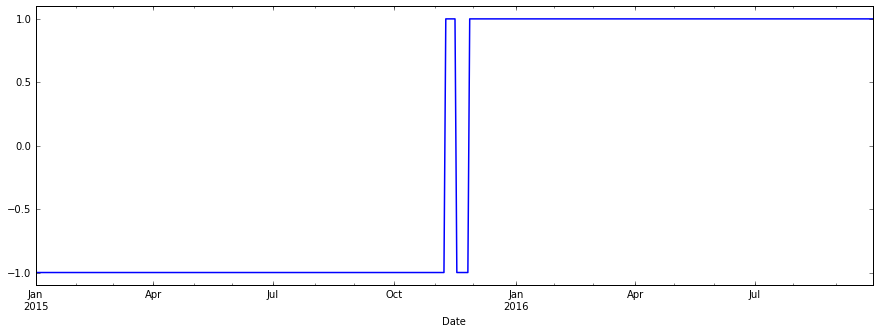

In [4]:
### Strategy
df['Regime'] = np.where(df['Adj Close']<df['Mean'],1,-1)

df['Regime'].plot(lw=1.5, ylim = [-1.1,1.1], figsize=(15,5))

In [5]:
adf = ts.adfuller(df['Adj Close'])
adf_statistic = adf[0]
adf_thresholds = adf[4].values()
              
is_mean_reversion = sum([threshold > adf_statistic 
                                for threshold in adf_thresholds]) ==3
        
if is_mean_reversion:
    print "Symbol: ", symbol, " has mean reversion"        

print adf    

(-1.1552990745094727, 0.69252349696462678, 0, 455, {'5%': -2.8679131843980197, '1%': -3.4448040131772584, '10%': -2.5701646673107112}, -140.47737084627772)


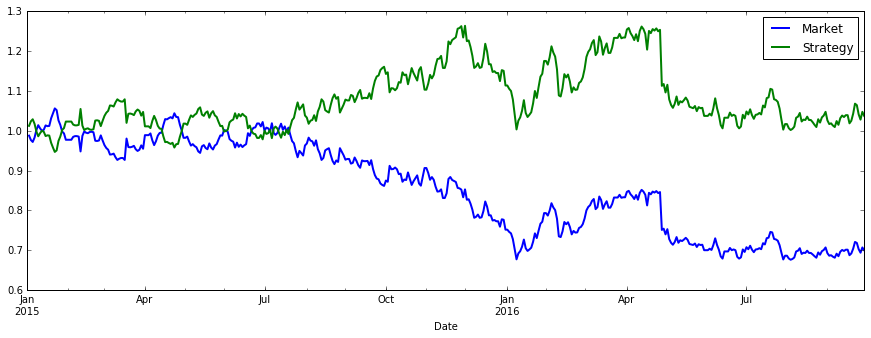

In [6]:
##################################################################
## Backtesting: How does this perform with respect to the market?
##################################################################

df['Market'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
df['Strategy'] = df['Regime'].shift(1)*df['Market']
df[['Market','Strategy']].cumsum().apply(np.exp).plot(figsize=(15,5), linewidth=2)
#    
